In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
imdb_source = pd.read_csv('files/IMDb Movies India.csv')

In [3]:
display(imdb_source.shape)
display(imdb_source.info())
display(imdb_source.describe())

(15509, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


None

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Cleaning data set

In [4]:
def clear_year(year_str):
    if(type(year_str) == str):
        input = year_str.replace('(','').replace(')','')
        return float(input)
    return year_str

In [5]:
imdb_source['Year']=imdb_source['Year'].apply(clear_year)

In [6]:
year_na = imdb_source['Rating'].notna()
rating_na = imdb_source['Year'].notna()
year_rating = imdb_source[year_na & rating_na]
year_rating.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12472,Saranga,1961.0,130 min,"Action, Drama, Romance",4.5,24,Dhirubhai Desai,Sudesh Kumar,Jayshree Gadkar,Nilofar
2817,Chand,1959.0,149 min,Drama,6.8,13,Lekhraj Bhakri,Balraj Sahni,Manoj Kumar,Meena Kumari
6783,Jogi the King,2005.0,172 min,"Action, Drama",7.3,266,Prem,Shivarajkumar,Neenasam Ashwath,Yana Gupta
8407,Maa,1992.0,145 min,"Drama, Fantasy",5.9,103,Ajay Kashyap,Jeetendra,Jaya Prada,Aruna Irani
2894,Charitraheen,1974.0,100 min,"Drama, Family",7.1,58,Shakti Samanta,Sharmila Tagore,Sanjeev Kumar,Yogeeta Bali
13468,Street Fighter,1995.0,148 min,Action,5.2,16,Gopal B.,Ali,Brahmanandam,Devan
12755,Shabnam Mausi,2005.0,150 min,"Action, Biography, Drama",6.2,56,Yogesh Bharadwaj,Ashutosh Rana,Sujeet Chaubey,Rashami Desai
12810,Shahrukh Bola 'Khoobsurat Hai Tu'... And She B...,2010.0,89 min,"Comedy, Drama",5.0,"1,043",Makrand Deshpande,Suzanne Bernert,Nagesh Bhonsle,Pritika Chawla
15407,Zara sambhal ke,2013.0,115 min,Drama,6.3,7,Sharadsingh Thakur,Yoggitta Dandaykar,Esshan Khan,Mohini Nillakant
1391,Aurat Ka Inteqam,1984.0,NaN,"Action, Drama",4.6,7,B.R. Ishara,Sudhir Dalvi,Mazhar Khan,Vinod Mehra


In [7]:
year_rating_summary = year_rating.groupby(by='Year').agg([np.min,np.max,np.mean,'count'])
year_rating_summary.sample(10)

Rating                     
         amin amax      mean count
Year                              
1977.0    3.3  8.1  6.231633    98
1950.0    6.0  8.5  7.061290    31
1966.0    3.8  8.2  6.455556    63
1967.0    4.4  8.0  6.564151    53
1997.0    2.5  9.1  5.379412   102
1947.0    4.1  8.7  6.531579    19
1956.0    2.8  8.2  6.357143    42
1942.0    5.6  7.6  6.512500     8
1980.0    3.2  8.4  6.057000   100
1986.0    2.6  7.8  5.891736   121

<AxesSubplot:xlabel='Year'>

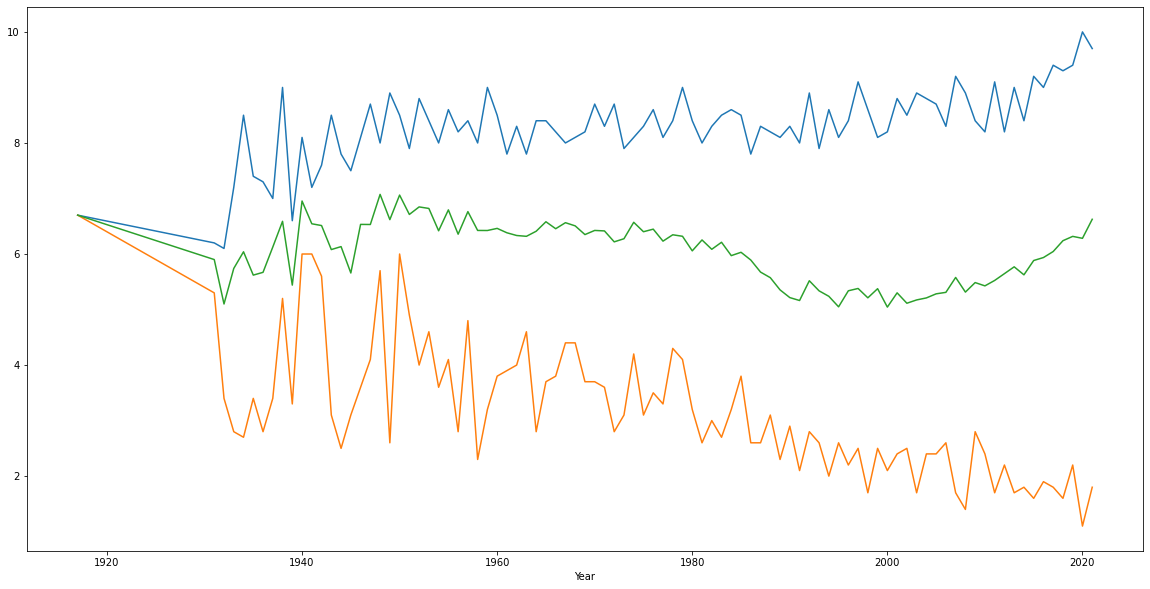

In [57]:
f, ax = plt.subplots(figsize=(20,10))
year_rating_summary['Rating']['amax'].plot()
year_rating_summary['Rating']['amin'].plot()
year_rating_summary['Rating']['mean'].plot()

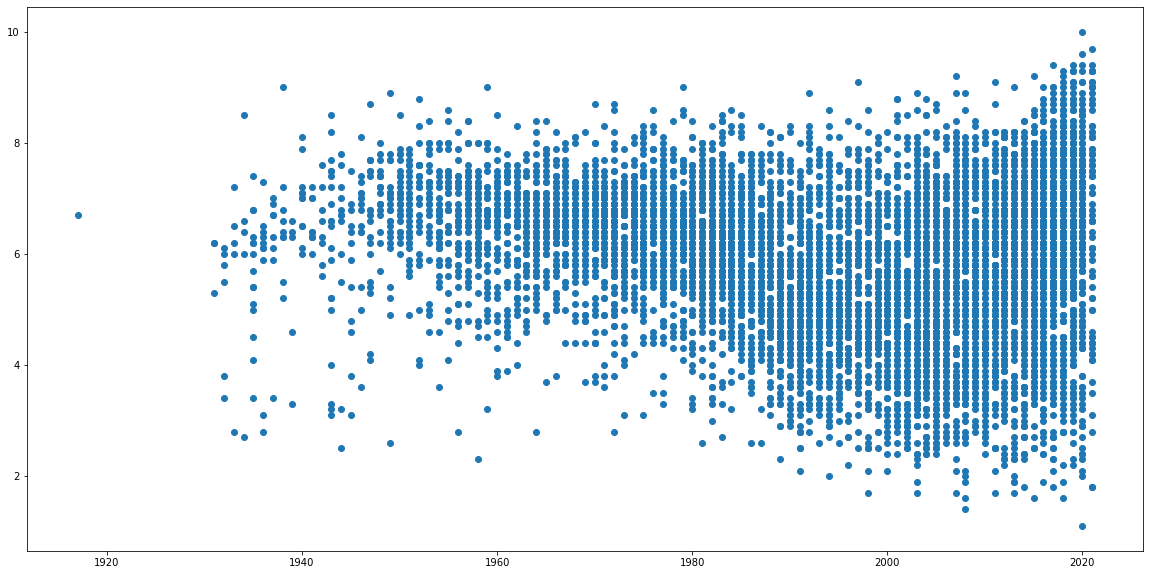

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(year_rating['Year'],year_rating['Rating'])

Number of movies over the years

<AxesSubplot:xlabel='Year'>

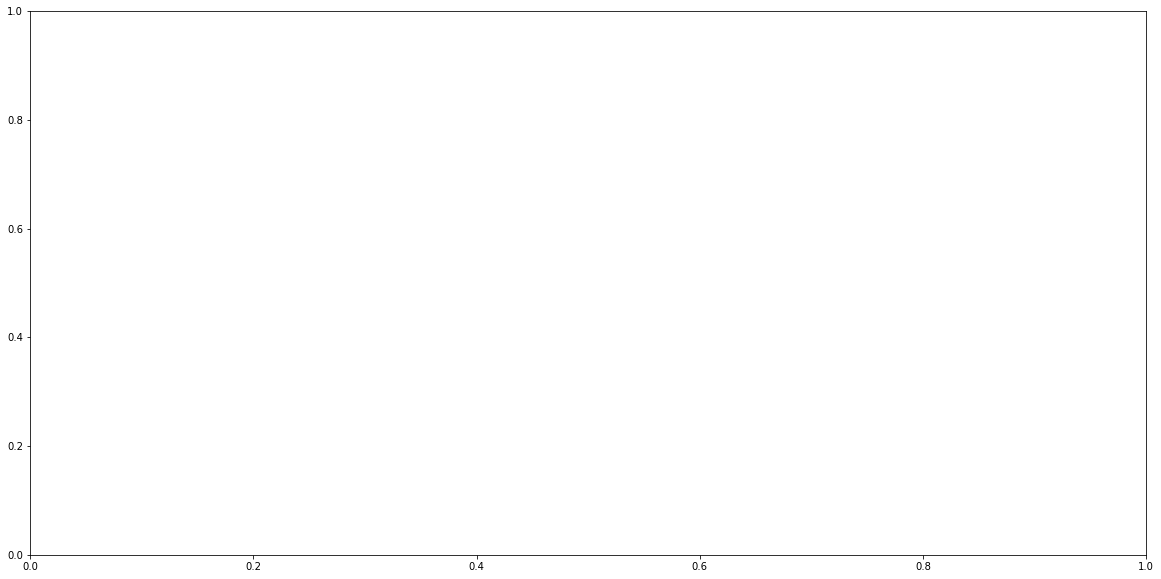

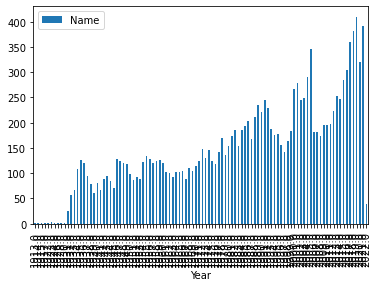

In [70]:
f, ax = plt.subplots(figsize=(20,10))
no_movies = imdb_source[imdb_source['Year'].notna()][['Year','Name']]
no_movies.groupby('Year').count().plot.bar()